## Introduction
I am just trying to analysis about the data set of Seattle city in AirBnB. If I would like to be a owner of a accomodation. I would like to know what type of house I should have, what point I should take care about and how much price I should set for the acccmodation.

This Project analysises dataset of Seattle city close to Washington (US).

### 1. Business Understanding<br>
<br>
This is the Seattle AirBnB homes data can be used at Kaggle. The link is below.<br>
https://www.kaggle.com/airbnb/seattle<br>
<br>
Content <br>
The following Airbnb activity is included in this Seattle dataset:<br>
<br>
Listings, including full descriptions and average review score<br>
Reviews, including unique id for each reviewer and detailed comments<br>
Calendar, including listing id and the price and availability for that day<br>
<br>
With the given dataset we will try to understand the following:-<br>
<br>
** **<br>
1. Whether the number of rooms, the number of beds, the number of bathrooms, etc. correlates with the number of high ratings？<br>
** **<br>
2. What type of accommodation is high scores review rating?<br>
** **<br>
3. Is it possible to predict the price of accommodations from the highly evaluated results?<br>
** **<br>

###  2. Data Understanding¶
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

Access

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


・Reading the csv and viewing few rows to have a look at the dataframe

In [4]:
# read the csv
reviews = pd.read_csv('./reviews.csv')
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')

# Avoid overlapping areas
from pylab import rcParams
rcParams['figure.figsize'] = 15,15 
plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

We have imported numpy ,pandas for basic data analysis. Matplotlib and seaborn for data visualization.

### Loading csv files and working on them.

In [5]:
# Check the contents of the dataset.
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [6]:
num_rows = reviews.shape[0] #Provide the number of rows in the dataset
num_cols = reviews.shape[1] #Provide the number of columns in the dataset

print(num_rows)
print(num_cols)

84849
6


In [7]:
# Check the information of the dataset.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
no_nulls = set(reviews.columns[reviews.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls)

{'reviewer_id', 'date', 'reviewer_name', 'id', 'listing_id'}


#### ・Observing the reviews data 
The data in the comments of the deta set may help in the analysis, but I'm not sure yet.
<br>
<br>

In [9]:
# Check the contents of the dataset.
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [10]:
num_rows_2 = calendar.shape[0] #Provide the number of rows in the dataset
num_cols_2 = calendar.shape[1] #Provide the number of columns in the dataset

print(num_rows_2)
print(num_cols_2)

1393570
4


In [11]:
# Check the information of the dataset.
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [12]:
no_nulls_2 = set(calendar.columns[calendar.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls_2)

{'listing_id', 'date', 'available'}


#### ・Observing the calendar data
The data in the price of the deta set may help in the analysis, but I'm not sure yet.
<br>
<br>

Check the listings dataset by some meshods and find some usuful data for analysis.

In [13]:
# Check the contents of the dataset.
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [14]:
num_rows_3 = listings.shape[0] #Provide the number of rows in the dataset
num_cols_3 = listings.shape[1] #Provide the number of columns in the dataset

print(num_rows_3)
print(num_cols_3)

3818
92


In [15]:
# Check the information of the dataset.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [16]:
# Check the summary statistics associated with the quantitative variables in your dataset.
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [17]:
no_nulls_3 = set(listings.columns[listings.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls_3)

{'require_guest_phone_verification', 'latitude', 'smart_location', 'availability_90', 'id', 'name', 'availability_30', 'experiences_offered', 'instant_bookable', 'guests_included', 'availability_365', 'maximum_nights', 'neighbourhood_cleansed', 'price', 'host_url', 'country_code', 'requires_license', 'require_guest_profile_picture', 'accommodates', 'amenities', 'host_id', 'picture_url', 'description', 'has_availability', 'host_verifications', 'neighbourhood_group_cleansed', 'market', 'longitude', 'calendar_updated', 'jurisdiction_names', 'minimum_nights', 'street', 'bed_type', 'last_scraped', 'scrape_id', 'state', 'calculated_host_listings_count', 'extra_people', 'availability_60', 'calendar_last_scraped', 'city', 'is_location_exact', 'listing_url', 'number_of_reviews', 'cancellation_policy', 'room_type', 'country'}


In [18]:
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.5])#Provide a set of columns with more than 50% of the values missing
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

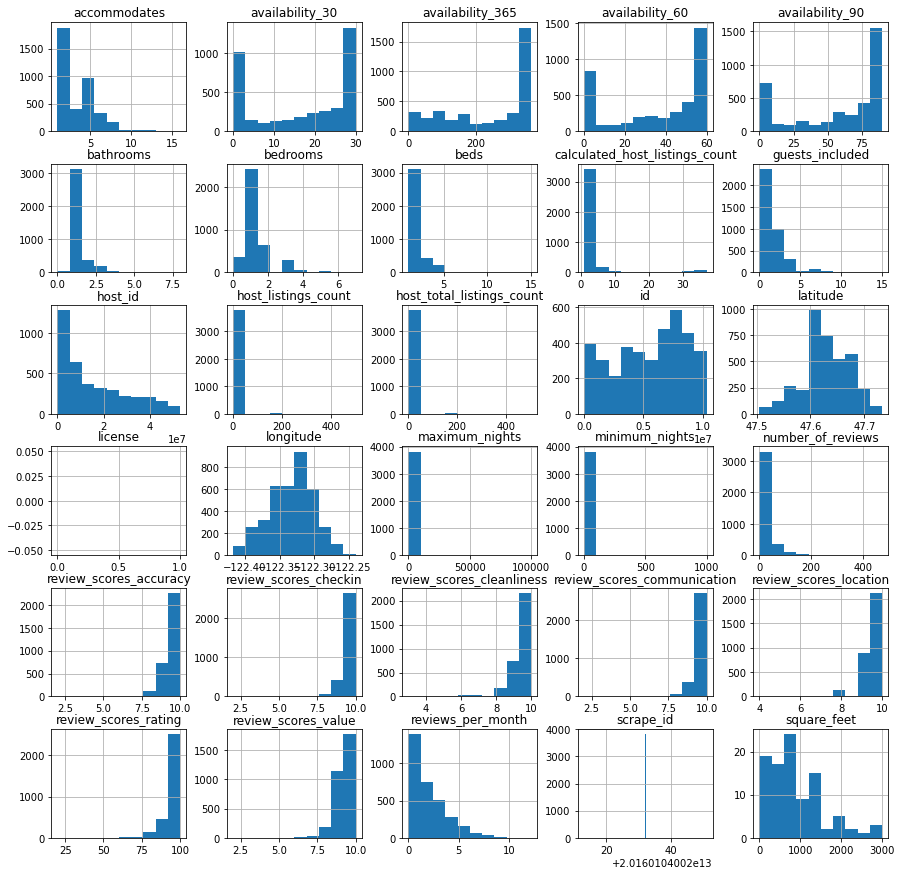

In [19]:
# Check the histgram data of columns.
listings.hist();

#### ・Observing the listings data
It seems that there are many usuful data for analylsis.
<br>
<br>

### 3. Preparation data<br>
reviews = reviews.csv : The comment data may be useful, but I won't use it in this analysis.<br>
calendar = calendar.csv: The price data seems to be useful, but it's included in the listing data, so I won't use it this time.<br>
listings = listings.csv: Since there seems to be data that may be useful for analysis, we will use some columns from this.<br>
<br>

I will forcus on "review_scores_rating" column. I would like to find an item that has a strong correlation with that column.

I pick the rows that are likely to help me to be a good owner or make a good accormodation.

"host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_neighbourhood", "host_verifications", "host_has_profile_pic","host_identity_verified", "property_type","room_type","accommodates","bathrooms", "bedrooms", "beds", "bed_type","amenities", "price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "cancellation_policy"

In [20]:
# check float data type of each columns.
print(listings.select_dtypes(include="float"))

      host_listings_count  host_total_listings_count   latitude   longitude  \
0                     3.0                        3.0  47.636289 -122.371025   
1                     6.0                        6.0  47.639123 -122.365666   
2                     2.0                        2.0  47.629724 -122.369483   
3                     1.0                        1.0  47.638473 -122.369279   
4                     2.0                        2.0  47.632918 -122.372471   
...                   ...                        ...        ...         ...   
3813                354.0                      354.0  47.664295 -122.359170   
3814                  1.0                        1.0  47.649552 -122.318309   
3815                  1.0                        1.0  47.508453 -122.240607   
3816                  1.0                        1.0  47.632335 -122.275530   
3817                  1.0                        1.0  47.641186 -122.342085   

      bathrooms  bedrooms  beds  square_feet  revie

In [21]:
# check int64 data type of each columns.
print(listings.select_dtypes(include="int64"))

            id       scrape_id   host_id  accommodates  guests_included  \
0       241032  20160104002432    956883             4                2   
1       953595  20160104002432   5177328             4                1   
2      3308979  20160104002432  16708587            11               10   
3      7421966  20160104002432   9851441             3                1   
4       278830  20160104002432   1452570             6                6   
...        ...             ...       ...           ...              ...   
3813   8101950  20160104002432  31148752             6                1   
3814   8902327  20160104002432  46566046             4                3   
3815  10267360  20160104002432  52791370             2                2   
3816   9604740  20160104002432  25522052             2                1   
3817  10208623  20160104002432  14703116             3                1   

      minimum_nights  maximum_nights  availability_30  availability_60  \
0                  1     

・After check each data above, I choose the columns below to find some association with review scores rating.<br>
   I'm interested in these columns because they may be usuful for thinking about accormodaiton type.

### 4. Modeling<br>
Analyse<br>
1.Whether the number of rooms, the number of beds, the number of bathrooms, etc. correlates with the number of high ratings？<br>
・Using heat maps, we investigate whether there is a correlation between each item of quantitative data and highly scores rating.

In [22]:
# sort the dataset to create a heat mapping.
listings_1 = listings[["review_scores_rating","bathrooms","bedrooms","beds","accommodates","guests_included","minimum_nights","maximum_nights"]]
listings_1

,review_scores_rating,bathrooms,bedrooms,beds,accommodates,guests_included,minimum_nights,maximum_nights
0,95.0,1.0,1.0,1.0,4,2,1,365
1,96.0,1.0,1.0,1.0,4,1,2,90
2,97.0,4.5,5.0,7.0,11,10,4,30
3,NaN,1.0,0.0,2.0,3,1,1,1125
4,92.0,2.0,3.0,3.0,6,6,1,1125
...,...,...,...,...,...,...,...,...
3813,80.0,2.0,3.0,3.0,6,1,3,1125
3814,100.0,1.0,1.0,2.0,4,3,2,29
3815,NaN,1.0,1.0,1.0,2,2,1,7
3816,NaN,1.0,0.0,1.0,2,1,3,1125


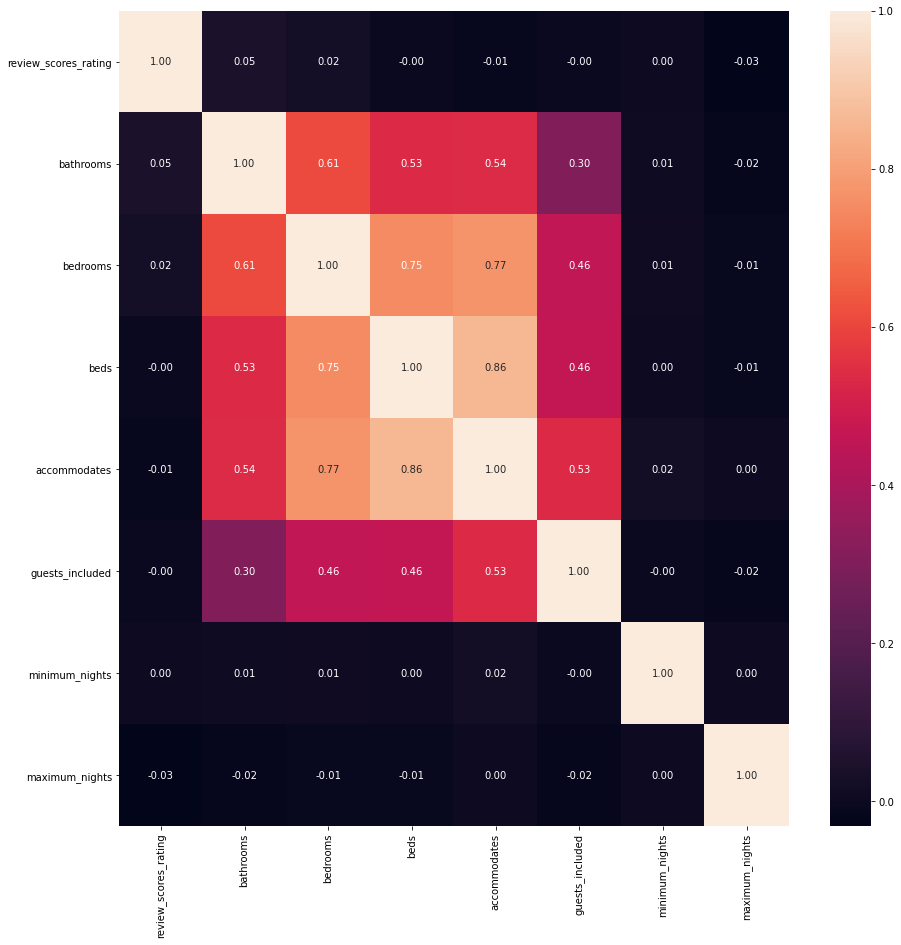

In [23]:
# make a heat map of these data.
sns.heatmap(listings_1.corr(), annot=True, fmt=".2f");

#### According to the heat map, there are very low association between review score rating and other columns.
If there are many number of any facilities and minimum or maximum nights, it is unlikely that they will be evaluated highly.

Next, examine the highly rated items in each column.

2. What type of accommodation is high scores review rating?<br>
・For the mean of each column of qualitative data, examine the items with high evaluation rates.

In [24]:
# sort the categorical dataset to create some visualization.
listings_2 = listings[["review_scores_rating","host_response_time","host_response_rate","host_is_superhost","host_neighbourhood","host_verifications","host_has_profile_pic","host_identity_verified","property_type","room_type","bed_type","amenities","price","weekly_price","monthly_price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "cancellation_policy", "neighbourhood"]]

In [25]:
# checke the missing value propotion of review scores rating data.
listings_2['review_scores_rating'].isnull().mean() # missing values

0.16946045049764275

In [26]:
def calculate_mean_rating():
    """This is to calculate which group in each column has the highest average high rating."""
items = len(listings_2.columns)
for i in range(items):
    new = listings_2.groupby([listings_2.iloc[0:, i]]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
    print(new)

review_scores_rating
100.0    100.0
99.0      99.0
98.0      98.0
97.0      97.0
96.0      96.0
95.0      95.0
94.0      94.0
93.0      93.0
92.0      92.0
91.0      91.0
90.0      90.0
89.0      89.0
88.0      88.0
87.0      87.0
86.0      86.0
85.0      85.0
84.0      84.0
83.0      83.0
82.0      82.0
81.0      81.0
80.0      80.0
79.0      79.0
78.0      78.0
77.0      77.0
76.0      76.0
75.0      75.0
74.0      74.0
73.0      73.0
72.0      72.0
71.0      71.0
70.0      70.0
68.0      68.0
67.0      67.0
66.0      66.0
65.0      65.0
64.0      64.0
60.0      60.0
57.0      57.0
55.0      55.0
53.0      53.0
40.0      40.0
20.0      20.0
Name: review_scores_rating, dtype: float64
host_response_time
within an hour        95.143984
within a day          94.264831
within a few hours    93.812425
a few days or more    87.793103
Name: review_scores_rating, dtype: float64
host_response_rate
56%     100.000000
17%     100.000000
65%     100.000000
30%     100.000000
38%     100.000000
95

cancellation_policy
flexible    94.810256
moderate    94.671958
strict      94.251392
Name: review_scores_rating, dtype: float64
neighbourhood
Arbor Heights            98.000000
High Point               97.750000
Windermere               97.500000
Yesler Terrace           97.454545
Harrison/Denny-Blaine    97.181818
                           ...    
South Beacon Hill        89.500000
View Ridge               88.200000
South Park               88.000000
University District      87.619048
Pinehurst                85.666667
Name: review_scores_rating, Length: 79, dtype: float64


・According to the result above, I picked up these columns.<br>
Host response time, Neighbourhood, Host verifications, Property type, room_type, bed_type, Guests included, Price<br>
You can see which of these items have the highest average rating. <br>
And you can imagine what type of accommodation is highly rated.

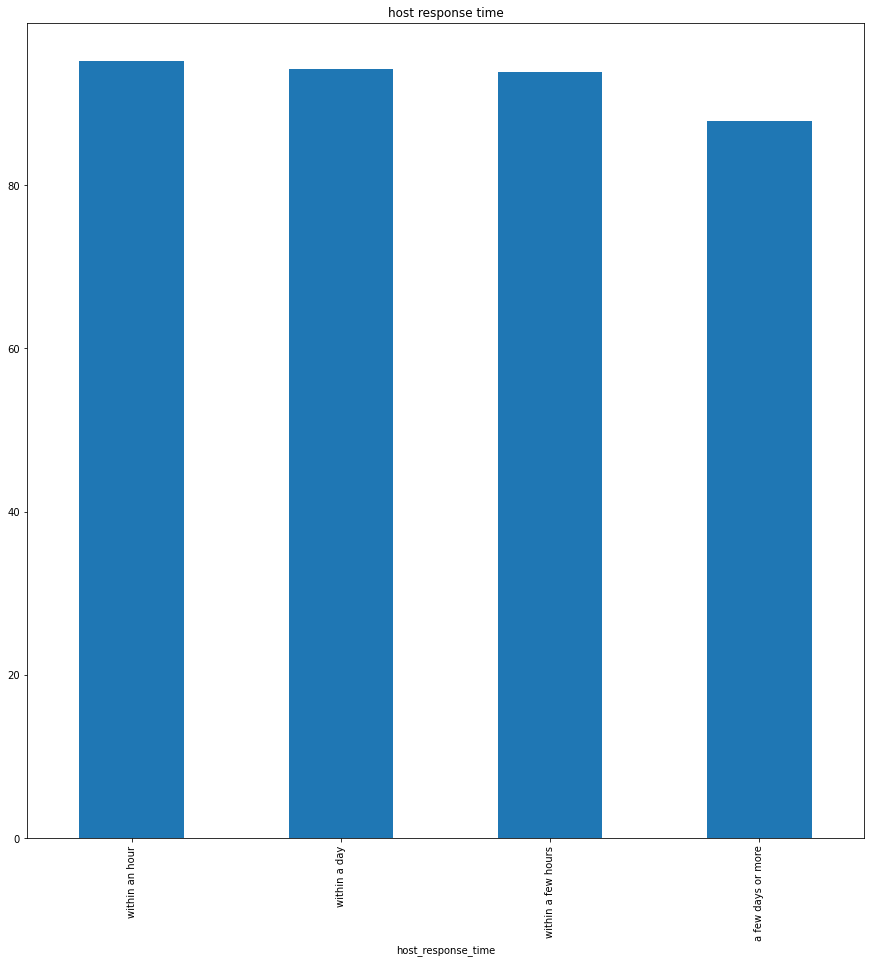

In [27]:
# visualization of host response time
host_response_time = listings_2.groupby(["host_response_time"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
host_response_time.plot(kind="bar") 
plt.title("host response time");

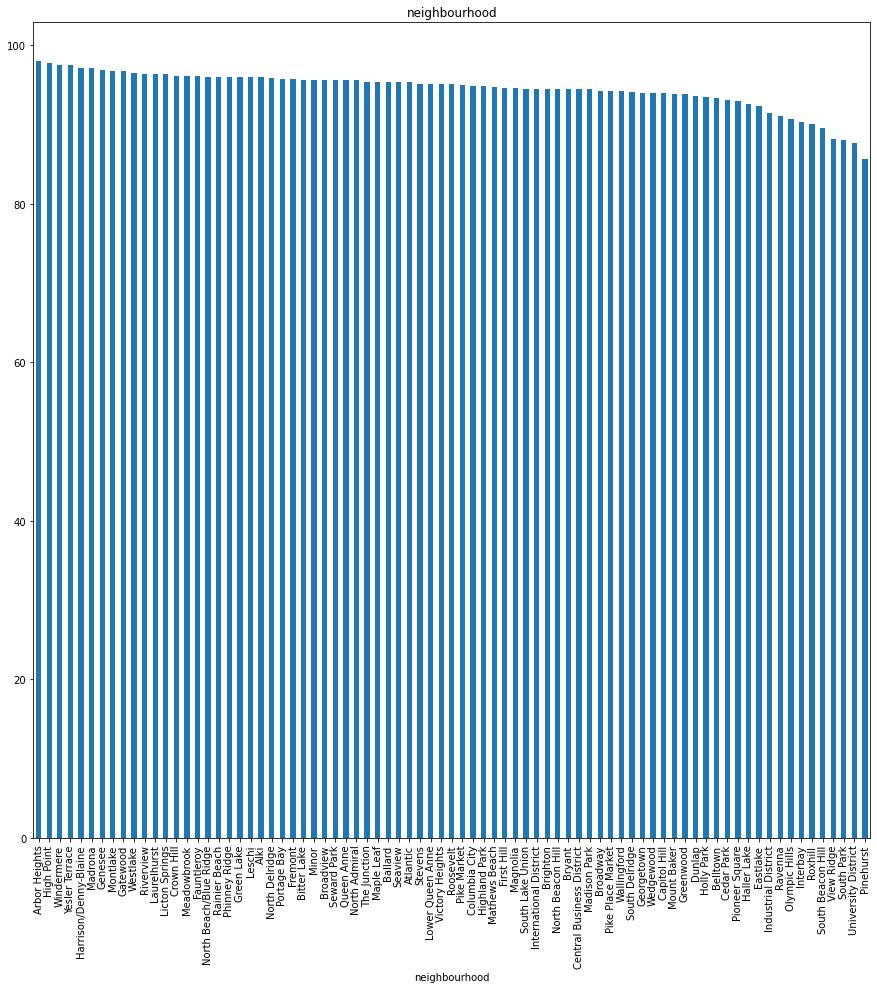

In [28]:
# visualization of host neighbourhood
neighbourhood = listings_2.groupby(["neighbourhood"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
neighbourhood.plot(kind="bar") 
plt.title("neighbourhood");

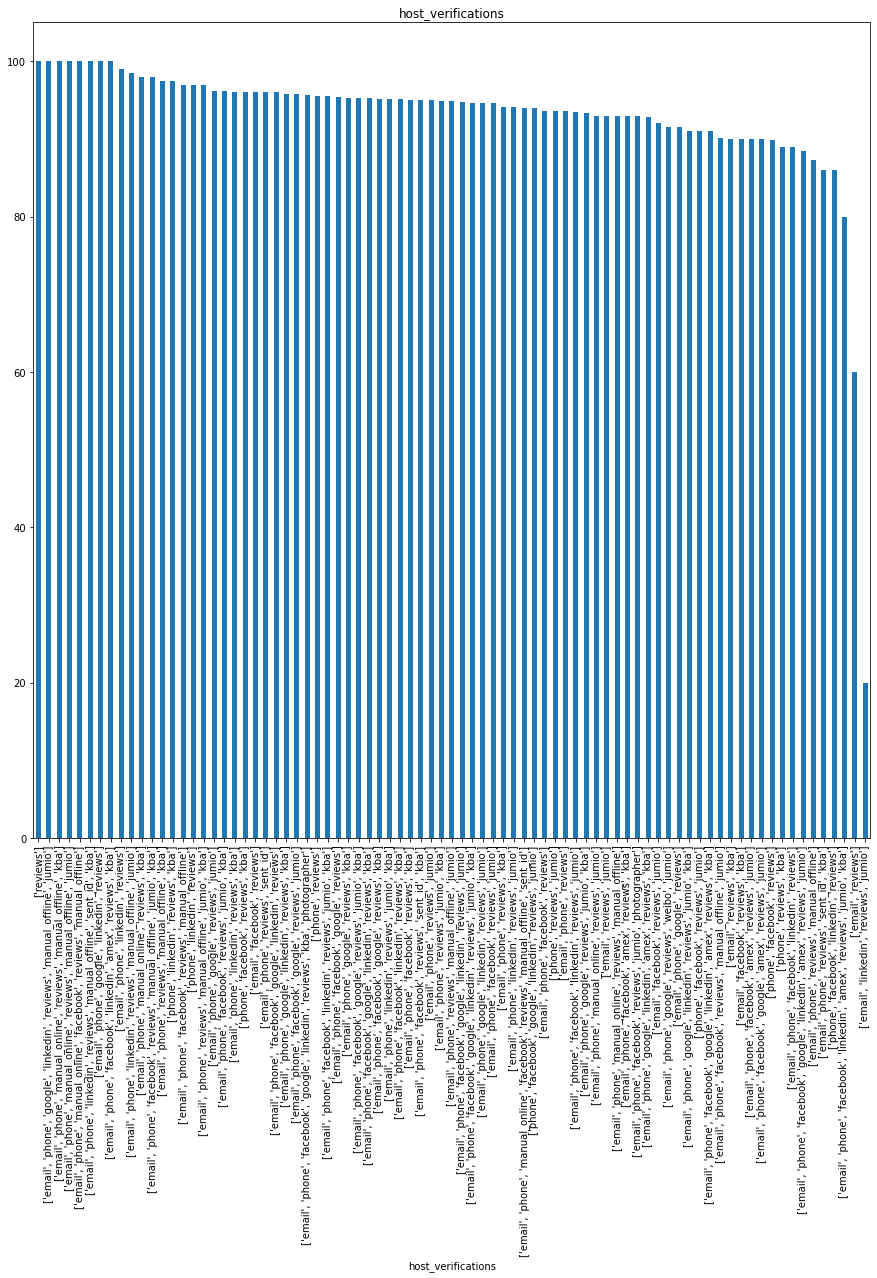

In [29]:
# visualization of host_verifications
host_verifications= listings_2.groupby(["host_verifications"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
host_verifications.plot(kind="bar") 
plt.title("host_verifications");

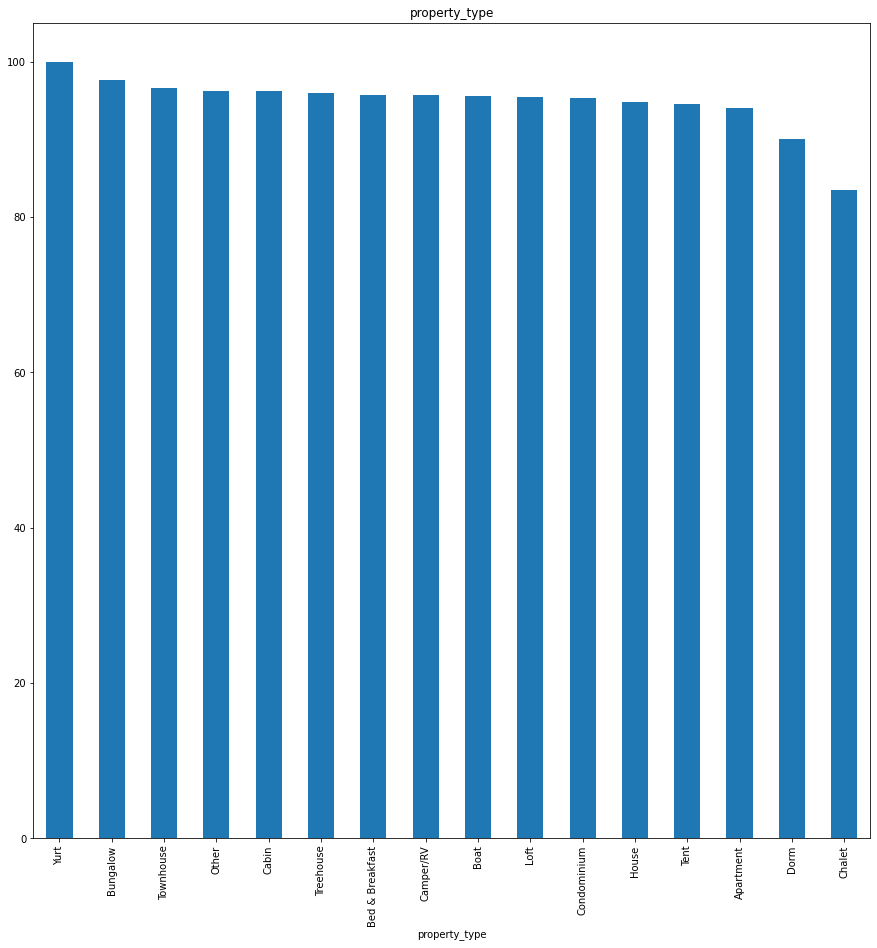

In [30]:
# visualization of property_type
property_type= listings_2.groupby(["property_type"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
property_type.plot(kind="bar") 
plt.title("property_type");

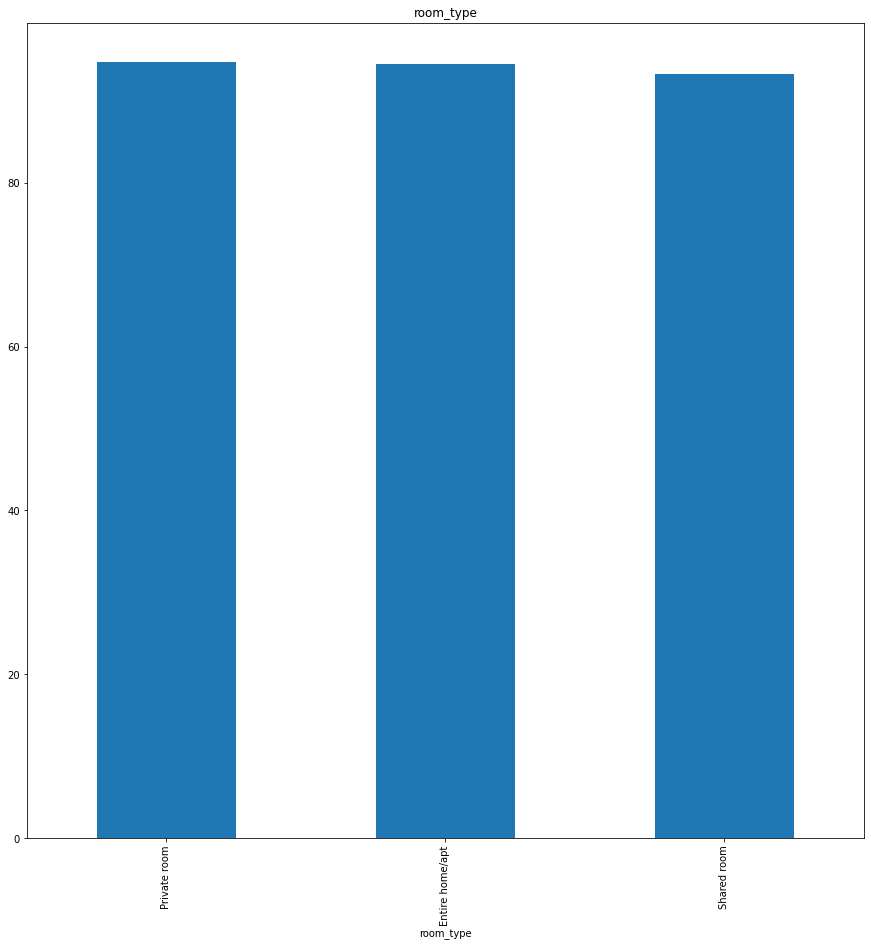

In [31]:
# visualization of room_type
room_type= listings_2.groupby(["room_type"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
room_type.plot(kind="bar") 
plt.title("room_type");

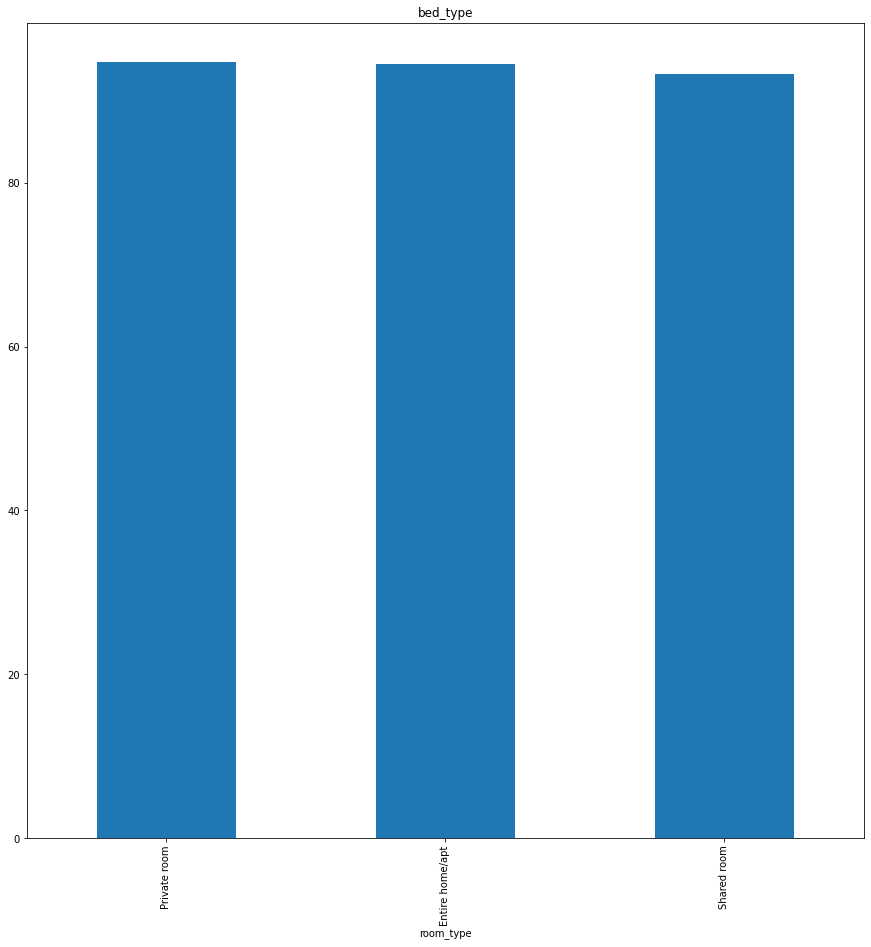

In [32]:
# visualization of bed_type
bed_type= listings_2.groupby(["room_type"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
bed_type.plot(kind="bar") 
plt.title("bed_type");

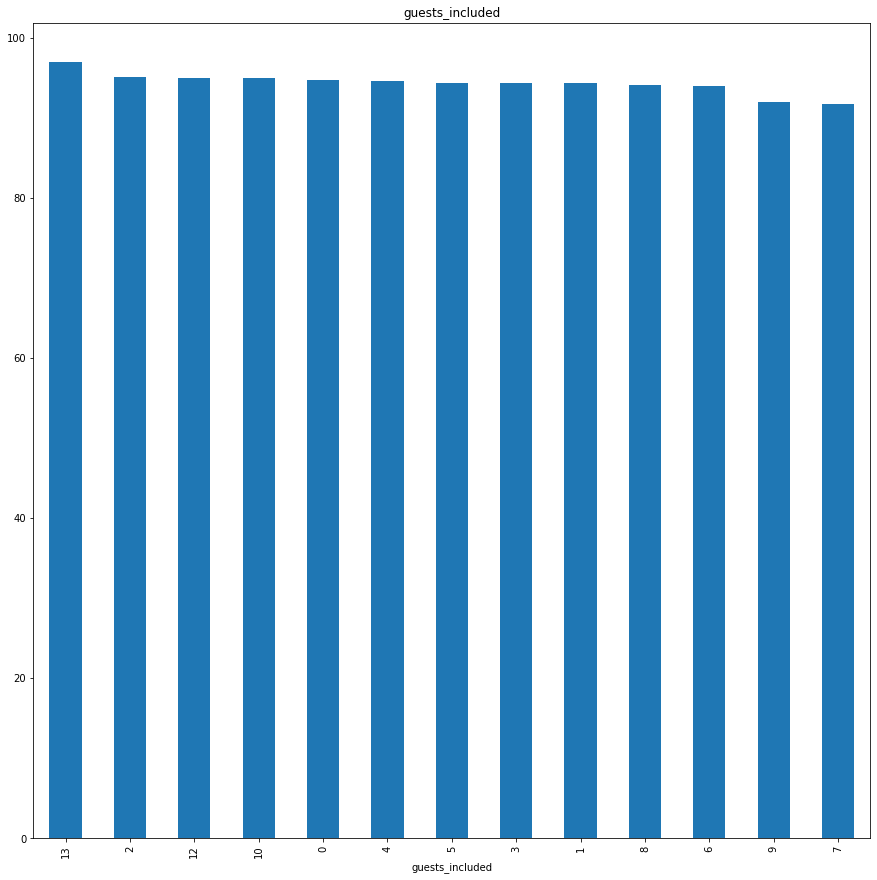

In [33]:
# visualization of guests_included
guests_included= listings_2.groupby(["guests_included"]).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
guests_included.plot(kind="bar") 
plt.title("guests_included");

Finally, check if the price can be predicted by review_scores_rating with simple linear regression analysis.

3. Is it possible to predict the price of accommodations from the highly evaluated results?<br>
・Find out if simple regression analysis can predict prices from highly valued data.

In [34]:
# remove '$' word of 'price' data and change the data type to float64.
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
listings_2['price']=listings_2.price.map(lambda x: locale.atof(x.strip('$')))

C:\Users\ironb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
# check the data type of price.
listings_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_scores_rating    3171 non-null   float64
 1   host_response_time      3295 non-null   object 
 2   host_response_rate      3295 non-null   object 
 3   host_is_superhost       3816 non-null   object 
 4   host_neighbourhood      3518 non-null   object 
 5   host_verifications      3818 non-null   object 
 6   host_has_profile_pic    3816 non-null   object 
 7   host_identity_verified  3816 non-null   object 
 8   property_type           3817 non-null   object 
 9   room_type               3818 non-null   object 
 10  bed_type                3818 non-null   object 
 11  amenities               3818 non-null   object 
 12  price                   3818 non-null   float64
 13  weekly_price            2009 non-null   object 
 14  monthly_price           1517 non-null   

In [36]:
# Fill in a null value for review_scores_rating on average.
listings_2['review_scores_rating'] = listings_2['review_scores_rating'].fillna(listings_2['review_scores_rating'].mean())

C:\Users\ironb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Split into explanatory and response variables
X = listings_2.loc[:,['review_scores_rating']].values
y = listings_2.loc[:,['price']].values

In [38]:
# Create an instance of linear regression model (LinearRegression) and train (fit) the data.
linear = LinearRegression()
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Calculate coefficients and intercepts
print(linear.coef_)
print(linear.intercept_)

[[0.7568793]]
[56.42135488]


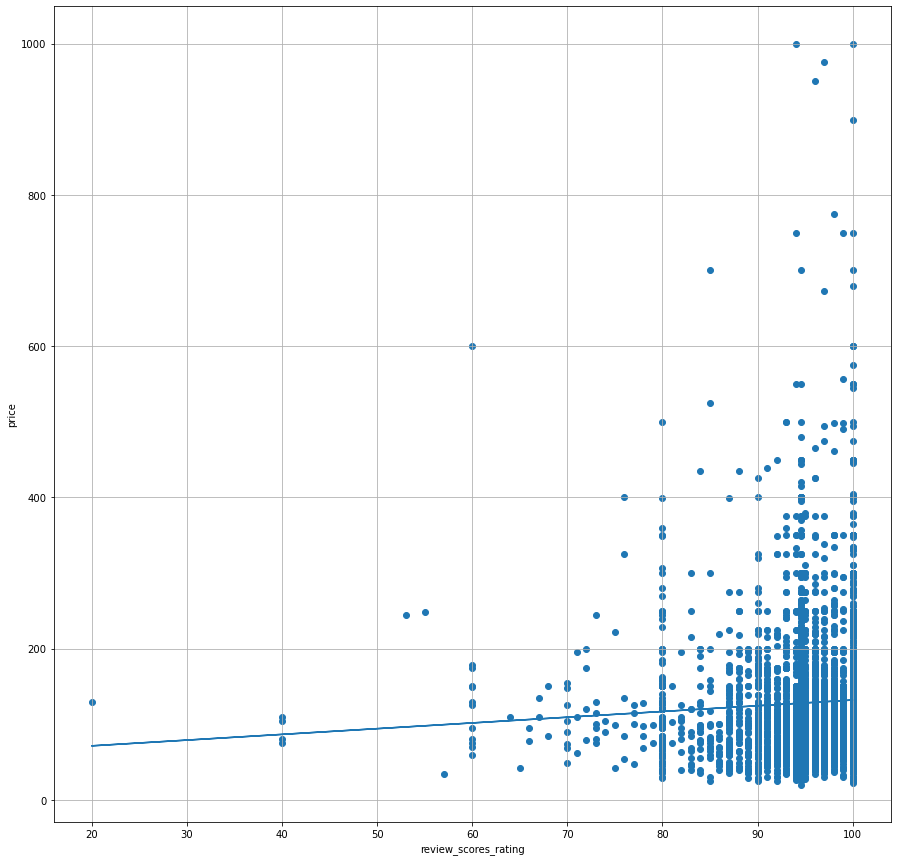

In [40]:
# Data prediction
plt.scatter(X, y)
plt.xlabel('review_scores_rating')
plt.ylabel('price')

plt.plot(X, linear.predict(X))
plt.grid(True)

In [41]:
# Calculation of coefficient of determination
print(linear.score(X, y))

0.0025490819685033417


・According to  the above results and the coefficient of determination, it seems difficult to predict the price based on the review score rating.

# Conclusion<br>
1. We found that the number of facilities(bedrooms, bathrooms, beds etc.) are not associated with high review rating. <br>
That means that the large number of facilities has little to do with high review ratings. So we can choose these that we would like.<br>
<br>
2.  We should have these points for accommodation:<br>
 ・Host response time ：within an hour (that’s better)<br>
 ・Neighborhood：Arbor Heights, High Point, Windermere<br>
 ・Host verifications：’email’, ‘phone’, ‘google’,’SNS’ , ‘review’, ‘manual_offline’<br>
 ・Property type：Yurt, Bungalow, Townhouse, Cabin<br>
 ・Room type and Bed type：Private room, Entire home/apt, Couch, Pull-out Sofa, Real Bed<br>
 ・Guests included：13 guests, 2 guests, 12 guests, 10 guests or 0<br>
<br>
3. price is quite difficult. I think it depends on other conditions.<br>
Neighborhood, Property type, Room type and Bed type and so on.<br>
It seems that not predicted by review ratings.<br>